In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer

In [ ]:
df= pd.read_csv("./datasets/updated_file.csv")

In [ ]:
df_brancos = pd.read_csv("./datasets/Coleta_Brancas.csv")
df_pardas = pd.read_csv("./datasets/Coleta_Pardas.csv")
df_negras = pd.read_csv("./datasets/Coleta_Negras.csv")

In [ ]:
df = pd.concat([df_negras, df_brancos, df_pardas]).reset_index()
df = df.dropna(subset=["Original_Text", "Cor", "Conclusao"])

In [ ]:
df = df.drop(columns=["Name"], axis=1)

In [ ]:
df.info()

In [ ]:
labels = df["Cor"].value_counts().reset_index()

In [ ]:
labels

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax.pie(labels["count"], labels=labels["Cor"], autopct="%.2f%%")
ax.set_title("Grupo Étnico Racial da Coleta")
plt.show()

In [ ]:
nltk.download('stopwords')
stemmer = PorterStemmer()

In [ ]:
def textPreprocessor(featureRecord):
    #Remove punctuations
    removePunctuation = [char for char in featureRecord if char not in string.punctuation]
    sentences =''.join(removePunctuation)

    #convert sentences to words
    words = sentences.split(" ")

    #normalize
    wordNormalized=[word.lower() for word in words]

    #remove stropwords
    finalWords=[word for word in wordNormalized if word not in stopwords.words("portuguese")]

    finalWords = [stemmer.stem(word) for word in finalWords]

    #joined = ' '.join(finalWords)

    return finalWords

In [ ]:
!pip3 install spacy
!pip3 install unidecode

In [ ]:
!python3 -m spacy download pt_core_news_sm;

In [43]:
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from unidecode import unidecode

# Download Portuguese stopwords
stop_words = set(stopwords.words('portuguese'))

# Load the spaCy model for Portuguese
nlp = spacy.load("pt_core_news_sm")

def preprocess_text(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Retrieve the base form (lemma) of each word and remove punctuation
    lemmatized_words = [token.lemma_ for token in doc if token.text not in string.punctuation]

    # Remove stopwords and newline characters after lemmatization
    filtered_words = [word for word in lemmatized_words if word.lower() not in stop_words and word != '\n']

    # Remove accents from words
    cleaned_words = [unidecode(word) for word in filtered_words]

    # Reconstruct the text without stopwords, punctuation, accents, and newline characters
    preprocessed_text = ' '.join(cleaned_words)

    return preprocessed_text

# Example usage
text = "Estou correndo e pulando, mas com stopwords e \n que precisamos remover."
processed_text = preprocess_text(text)
print(processed_text)

correndo pular stopwords 
  precisar remover


In [44]:
df_sample = df.sample(frac=0.1, random_state=42)

In [45]:
df_sample["Original_Text"] = df_sample["Original_Text"].apply(preprocess_text)

In [46]:
df_sample.head(3)

,index,Original_Text,Cor,Conclusao
755,300,EXCELENTISSIMO SENHOR DOUTOR JUIZ de o VARA ...,Branca,GANHO
132,132,MM JUIZO I JUIZADO ESPECIAL CIVEL de o COMARCA...,Negra,AMBIGUO
950,95,JUIZO VARAS FEDERAIS de o SUBSECAO JUDICIARI...,Parda,AMBIGUO


In [47]:
df["Original_Text"] = df["Original_Text"].apply(preprocess_text)

In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Cor' column
df['Cor'] = label_encoder.fit_transform(df['Cor'])

# TF - IDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer with stop words in Portuguese and using L2 normalization
Tfidf = TfidfVectorizer(norm='l2')

# Transform the text data in the "remainder__Original_Text" column of your DataFrame
X = Tfidf.fit_transform(df["Original_Text"]).toarray()


# Modelo

In [50]:
y = df["Cor"]

In [51]:
X

array([[0.08047501, 0.08092334, 0.03441088, ..., 0.        , 0.        ,
        0.        ],
       [0.01543695, 0.01034863, 0.008251  , ..., 0.        , 0.        ,
        0.        ],
       [0.02847682, 0.01909031, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02607419, 0.01411817, 0.00857635, ..., 0.        , 0.        ,
        0.        ],
       [0.03042766, 0.01835831, 0.00867385, ..., 0.        , 0.        ,
        0.        ],
       [0.19987356, 0.13470409, 0.04091427, ..., 0.        , 0.        ,
        0.        ]])

In [52]:
y

1       1
4       1
5       1
27      1
31      1
       ..
1219    2
1220    2
1221    2
1222    2
1224    2
Name: Cor, Length: 359, dtype: int32

In [53]:
df

,index,Original_Text,Cor,Conclusao
1,1,Exmo sr. Dr. Juiz de o MM 3a Vara de o Traba...,1,PERDIDO
4,4,fls 2 EXMO SR DR JUIZ de O TRABALHO 1a VARA ...,1,AMBIGUO
5,5,Exmo sr. Dr. Juiz de o MM 16a Vara de o Trab...,1,PERDIDO
27,27,EXMO SR DR JUIZ DIREITO de o 1a VARA CIVEL d...,1,PERDIDO
31,31,MERITISSIMO JUIZO VARAS CIVEIS de o COMARCA AR...,1,GANHO
...,...,...,...,...
1219,364,EXCELENTISSIMO SENHOR DOUTOR DESEMBARGADOR P...,2,AMBIGUO
1220,365,fls 2 www.bragasantos.com.br 00.000 OAB UF EXC...,2,PERDIDO
1221,366,EXCELENTISSIMO SENHOR DOUTOR JUIZ FEDERAL de o...,2,AMBIGUO
1222,367,EXCELENTISSIMO SENHOR DOUTOR JUIZ FEDERAL de o...,2,AMBIGUO


In [54]:
df_sample = pd.read_csv("./datasets/updated_file.csv")

In [55]:
df_sample

,Name,Original_Text,Color,Label
0,Marcio Rocha,EXCELENTÍSSIMO DOUTOR JUIZ DE DIREITO DA 3a VA...,Negra,Aberto
1,Antonio Marcos Da Silva,EXCELENTÍSSIMO (A). SR (A). DR (A). JUIZ (A) D...,Branca,Aberto
2,Felipe Ribeiro Souza,EXCELENTÍSSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...,Branca,Aberto
3,Renata Barbosa De Almeida,EXMO. SR. DR. JUIZ DE DIREITO DA 2a VARA DA FA...,Branca,Fechado
4,Luiz Dos Santos,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ DE DIREITO D...,Negra,Aberto
...,...,...,...,...
1215,Lincoln Assuncao,AO JUÍZO DO 5º JUIZADO ESPECIAL CIVEL DA COMAR...,Branca,Aberto
1216,Clarissa Rodrigues,EXCELENTÍSSIMO SENHOR DESEMBARGADOR RELATOR DA...,Branca,Aberto
1217,Maria Lucilia Borges,EXMO (A) SR (A) JUIZ (A) FEDERAL DO JUIZADO ES...,Branca,Fechado
1218,Jose Das Dores De Oliveira,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ DE DIREITO D...,Parda,Aberto


# PCA

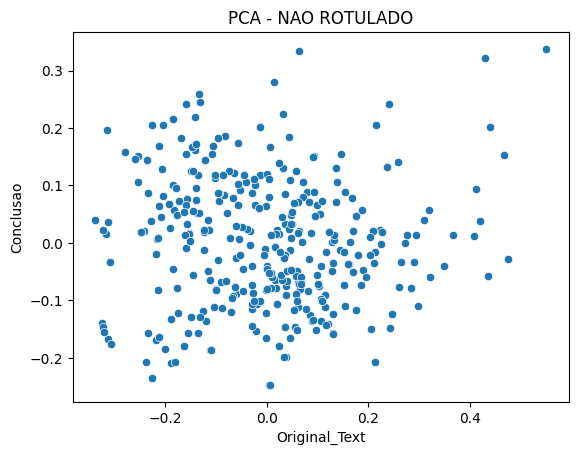

In [58]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd




pca = PCA(n_components=3)

X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['Original_Text', 'Cor', "Conclusao"])



# Visualize the transformed data
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Original_Text', y='Conclusao', data=df_pca)
plt.title('PCA - NAO ROTULADO')
plt.show()

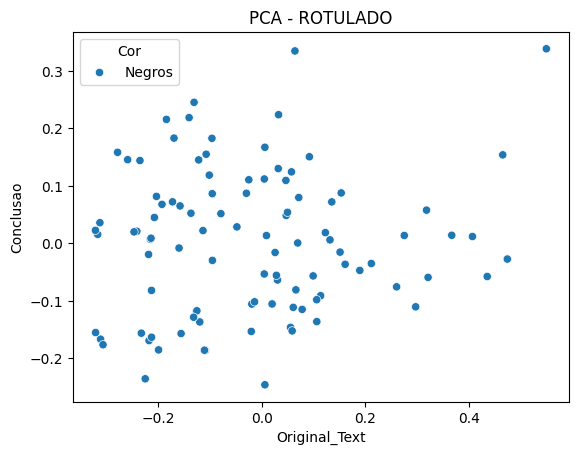

In [60]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd



# Instantiate the PCA model with the desired number of components
# In this example, we set n_components to 2 for 2D visualization
pca = PCA(n_components=3)

# Fit the PCA model and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame for visualization purposes
df_pca = pd.DataFrame(data=X_pca, columns=['Original_Text', 'Cor', "Conclusao"])

id_mapping = {0: 'Brancos', 1: 'Negros', 2: 'Pardos'}
df_pca['Cor'] = y.map(id_mapping)



# Visualize the transformed data
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Original_Text', y='Conclusao', hue='Cor', data=df_pca)
plt.title('PCA - ROTULADO')
plt.show()


In [61]:
df_pca

,Original_Text,Cor,Conclusao
0,0.222755,NaN,0.021765
1,-0.312187,Negros,0.035759
2,-0.212384,NaN,0.167987
3,-0.013126,NaN,0.117821
4,0.031983,Negros,0.129932
...,...,...,...
354,-0.236783,NaN,-0.207776
355,-0.212607,Negros,-0.082024
356,-0.316433,Negros,0.015447
357,-0.320789,Negros,0.022464


In [62]:
from datetime import datetime

# Get the current date and time
current_datetime = datetime.now()

# Format the date and time as a string
formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S")


In [63]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

# Avaliação

In [64]:
#Creating a function to display model results
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluation_parametrics(name,y_test, y_pred):
    cm_test = confusion_matrix(y_test, y_pred )
    t1 = ConfusionMatrixDisplay(cm_test, display_labels=["Brancos","Negros","Pardos"])    
    print("Classification Report for Data Test")
    print(classification_report(y_test, y_pred))
    t1.plot()

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression  # Replace with your model

# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = LogisticRegression(random_state=42, max_iter=1000, solver="lbfgs", penalty="l2", C=1, tol=0.0001)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.55555556 0.58333333 0.55555556 0.61111111 0.63380282]
Mean F1 Score: 0.5878716744913928


In [67]:

# y_pred = model.predict(X_test)

# micro_f1 = f1_score(y_test, y_pred,average='micro')
# macro_f1 = f1_score(y_test, y_pred,average='macro')

# print("Modelo Logist Regression")
# print(f"Macro: {macro_f1} ")
# print(f"Micro: {micro_f1}")

In [68]:
#Visualizing model results
# evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

NameError: name 'y_pred' is not defined

# SGD


In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier  # Replace with your model

# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = SGDClassifier(random_state=42,alpha=0.0001, )

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.65277778 0.625      0.69444444 0.68055556 0.70422535]
Mean F1 Score: 0.6714006259780907


# KNN

In [71]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = KNeighborsClassifier(n_neighbors=1, weights="uniform", algorithm="brute", leaf_size=30, p=2 )  # You can adjust the number of neighbors

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.63888889 0.63888889 0.56944444 0.73611111 0.74647887]
Mean F1 Score: 0.665962441314554


# SVM (SUPORT VECTOR MACHINE)

In [72]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = LinearSVC(penalty="l2", loss='squared_hinge', tol=0.000001, C=10, multi_class='ovr', dual=True)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.63888889 0.61111111 0.66666667 0.70833333 0.73239437]
Mean F1 Score: 0.6714788732394366


# RANDOM FOREST

In [74]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = RandomForestClassifier(n_estimators=100, criterion='log_loss', max_depth=None, random_state=42)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())

Cross-Validation Results: [0.63888889 0.625      0.65277778 0.63888889 0.5915493 ]
Mean F1 Score: 0.6294209702660407
